# Clean Data

In [66]:
import pandas as pd
import numpy as np
import os

In [67]:
#Initial read of main data file
austin_df = pd.read_csv('austin_311_service_requests.csv',low_memory=False)
austin_df.head()

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,map_tile,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key
0,AUSTIN,1/20/2015 10:41,Loose Dog,ACLONAG,3.0,TRAVIS,1/20/2015 10:41,1305 CORIANDER DR AUSTIN TX,78741.0,1/27/2015 12:51,...,ML18,Animal Services Office,Phone,3131141.687,10055318.32,Duplicate (closed),1/20/2015 10:41,CORIANDER,1305.0,15-00012439
1,AUSTIN,6/1/2016 10:58,Loose Dog,ACLONAG,7.0,TRAVIS,5/22/2016 10:00,3104 STONEWAY DR AUSTIN TX 78757,78757.0,6/1/2016 9:58,...,MJ29,Animal Services Office,Phone,3112134.249,10100830.00,Closed,6/1/2016 10:58,STONEWAY,3104.0,16-00123310
2,AUSTIN,1/6/2014 19:30,Loose Animal (not dog),ACLOANIM,2.0,TRAVIS,1/6/2014 18:04,4100 SMITH SCHOOL RD AUSTIN TX,78744.0,1/6/2014 18:32,...,MK16,Animal Services Office,Phone,3124825.402,10045969.80,Closed,1/6/2014 19:30,SMITH SCHOOL,4100.0,14-00003554
3,AUSTIN,11/19/2014 10:46,Austin Code - Request Code Officer,CODECOMP,7.0,TRAVIS,11/15/2014 15:43,12710 PALFREY DR AUSTIN TX 78727,78727.0,11/19/2014 10:46,...,ML35,Austin Code Department,Web,3124206.25,10128117.00,Closed,11/19/2014 10:46,PALFREY,12710.0,14-00247505
4,AUSTIN,8/25/2014 21:21,Animal - Proper Care,ACPROPER,1.0,TRAVIS,7/28/2014 17:33,6703 TULANE DR AUSTIN TX,78723.0,8/25/2014 20:23,...,MM26,Animal Services Office,Phone,3137129.998,10087210.23,Closed,8/25/2014 21:21,TULANE,6703.0,14-00156342


In [68]:
#Identify columns needed for analysis
austin_df = austin_df[["city", "county", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]
austin_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,1/20/2015 10:41,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,5/22/2016 10:00,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,1/6/2014 18:04,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,11/15/2014 15:43,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,7/28/2014 17:33,Animal Services Office,Animal - Proper Care,ACPROPER


In [69]:
#Change column names
austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Incident Zip",
                                      "created_date":"Date", "owning_department":"Department",
                                      "complaint_description":"Complaint Description","complaint_type":"Type of Complaint"})
austin_df.head(10)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,1/20/2015 10:41,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,5/22/2016 10:00,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,1/6/2014 18:04,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,11/15/2014 15:43,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,7/28/2014 17:33,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,6/20/2016 16:44,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,8/25/2015 11:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,8/26/2014 13:01,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,6/19/2015 16:31,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,8/1/2017 12:55,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [70]:
#Assess missing data
austin_df.count()

City                     454982
County                   452747
Incident Zip             454963
Date                     452741
Department               459305
Complaint Description    459305
Type of Complaint        459305
dtype: int64

In [71]:
#Assess missing data
austin_df.replace('', np.nan, inplace=True)
austin_df.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,1/20/2015 10:41,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,5/22/2016 10:00,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,1/6/2014 18:04,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,11/15/2014 15:43,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,7/28/2014 17:33,Animal Services Office,Animal - Proper Care,ACPROPER


In [72]:
#Assess missing data
austin_df.count()

City                     454982
County                   452747
Incident Zip             454963
Date                     452741
Department               459305
Complaint Description    459305
Type of Complaint        459305
dtype: int64

In [73]:
#Clean data
cleanaustin_df = austin_df.dropna(how="any")
cleanaustin_df.count()

City                     445845
County                   445845
Incident Zip             445845
Date                     445845
Department               445845
Complaint Description    445845
Type of Complaint        445845
dtype: int64

In [74]:
#Assess data
cleanaustin_df.head(20)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,1/20/2015 10:41,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,5/22/2016 10:00,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,1/6/2014 18:04,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,11/15/2014 15:43,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,7/28/2014 17:33,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,6/20/2016 16:44,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,8/25/2015 11:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,8/26/2014 13:01,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,6/19/2015 16:31,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,8/1/2017 12:55,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [75]:
#Assess data
cleanaustin_df['City'].value_counts()

AUSTIN              434876
PFLUGERVILLE          2072
DEL VALLE             1747
AUSTIN 5 ETJ          1204
MANOR                 1088
Austin                 538
austin                 498
CEDAR PARK             437
OTHER                  365
LEANDER                294
ROUND ROCK             252
BEE CAVE               234
WEST LAKE HILLS        232
LAKEWAY                203
SUNSET VALLEY          200
MUSTANG RIDGE          183
ELGIN                  179
MANCHACA               117
TRAVIS                 111
SPICEWOOD              106
BUDA                    99
JONESTOWN               92
LAGO VISTA              90
CREEDMOOR               76
ROLLINGWOOD             75
WEBBERVILLE             72
BRIARCLIFF              58
DRIPPING SPRINGS        46
CEDAR CREEK             34
COUPLAND                33
                     ...  
SAN MARCOS               2
Aus                      2
BEAR CREEK               2
austi                    2
AUstin                   2
Austin.                  2
E

In [76]:
#Limit data to Austin values
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.City.isin(value_list)]

In [77]:
#Assess data
austincity_df['City'].value_counts()

AUSTIN    434876
Austin       538
austin       498
Name: City, dtype: int64

In [78]:
#Limit data to Travis county
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.County.isin(value_list)]

In [79]:
#Assess data
austin311_df.count()

City                     422852
County                   422852
Incident Zip             422852
Date                     422852
Department               422852
Complaint Description    422852
Type of Complaint        422852
dtype: int64

In [80]:
#Change data type for zip code and future merge
austin311_df["Incident Zip"] = austin311_df["Incident Zip"].astype(int)

C:\Users\mraig\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
#Assess data
austin311_df.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741,1/20/2015 10:41,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757,5/22/2016 10:00,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744,1/6/2014 18:04,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727,11/15/2014 15:43,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723,7/28/2014 17:33,Animal Services Office,Animal - Proper Care,ACPROPER


# Median Household Income Data

In [82]:
austin_income_df = pd.read_csv('2014_Housing_Market_Analysis_Data_by_Zip_Code.csv',low_memory=False)
austin_income_df = austin_income_df[["Zip Code", "Median household income"]]
cleanaustin_df = austin_income_df.dropna(how="any")
cleanaustin_df["Zip Code"] = cleanaustin_df["Zip Code"].astype(int)
cleanaustin_df["Median household income"] = cleanaustin_df["Median household income"].replace( '[\$,)]', '', regex=True).astype(float)
cleanaustin = cleanaustin_df.rename(columns={"Zip Code":"zipcode"})
cleanaustin.head()

,zipcode,Median household income
0,78726,66096.0
1,78724,35711.0
2,78617,43957.0
3,78701,68152.0
4,78702,34734.0


# Population by Zip Code Data

In [83]:
austin_population_df = pd.read_csv('zips_population.csv',low_memory=False)
austin_population_df["Zip"] = austin_population_df["Zip"].astype(int)
austin_population_df["Population"] = austin_population_df["Population"].str.replace(",", "").astype(float)
austin_population = austin_population_df.rename(columns={"Zip":"zipcode"})
austin_population.head()

,zipcode,Population
0,78660,68789.0
1,78613,65099.0
2,78666,63836.0
3,78745,55614.0
4,78664,52932.0


In [84]:
#Merge median household income and population data
zip_income_population = pd.merge(cleanaustin, austin_population, on="zipcode", how="left")
zip_income_population.head()

,zipcode,Median household income,Population
0,78726,66096.0,13122.0
1,78724,35711.0,21696.0
2,78617,43957.0,22210.0
3,78701,68152.0,6841.0
4,78702,34734.0,21334.0


In [85]:
#Group call count by zip code
austin311_df["call_count"] = 1
austin311_zip_group = austin311_df.groupby(["Incident Zip"], as_index = 'False')
zip_group_calls = austin311_zip_group["call_count"].sum().reset_index('Incident Zip')
zip_group_calls_clean = zip_group_calls.rename(columns={"Incident Zip":"zipcode"})
print (zip_group_calls_clean)

    zipcode  call_count
0     78610          31
1     78613          10
2     78617        3276
3     78620           1
4     78621           1
5     78641          28
6     78645           1
7     78652         346
8     78653         555
9     78660        1696
10    78669           6
11    78701       16404
12    78702       25203
13    78703       16460
14    78704       29674
15    78705       12989
16    78712         412
17    78717           2
18    78719         619
19    78721       10030
20    78722        5386
21    78723       21723
22    78724        9734
23    78725        1839
24    78726        2235
25    78727        8245
26    78728        1549
27    78729         563
28    78730        1760
29    78731       13582
30    78732        1081
31    78733         608
32    78734         950
33    78735        4840
34    78736        2067
35    78737         266
36    78738         184
37    78739        5581
38    78741       19115
39    78742         836
40    78744     

C:\Users\mraig\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
#Merge grouped call count by zip with median household income and population data
zip_income_population_calls = pd.merge(zip_income_population, zip_group_calls_clean, on="zipcode", how="left")
zip_income_population_calls.head()

,zipcode,Median household income,Population,call_count
0,78726,66096.0,13122.0,2235
1,78724,35711.0,21696.0,9734
2,78617,43957.0,22210.0,3276
3,78701,68152.0,6841.0,16404
4,78702,34734.0,21334.0,25203


In [87]:
#Create bins for median household income groups
bins = [0, 50000, 75000, 100000, 1000000]
income_groups = ["Less than $50k", "Between $50k to $75k", "Between $75k to $100k", "Over $100k"]
pd.cut(zip_income_population_calls["Median household income"], bins, labels=income_groups)

0      Between $50k to $75k
1            Less than $50k
2            Less than $50k
3      Between $50k to $75k
4            Less than $50k
5     Between $75k to $100k
6      Between $50k to $75k
7            Less than $50k
8     Between $75k to $100k
9            Less than $50k
10           Less than $50k
11           Less than $50k
12     Between $50k to $75k
13           Less than $50k
14     Between $50k to $75k
15               Over $100k
16    Between $75k to $100k
17               Over $100k
18     Between $50k to $75k
19               Over $100k
20           Less than $50k
21           Less than $50k
22           Less than $50k
23           Less than $50k
24               Over $100k
25     Between $50k to $75k
26    Between $75k to $100k
27    Between $75k to $100k
28           Less than $50k
29           Less than $50k
30           Less than $50k
31     Between $50k to $75k
32     Between $50k to $75k
33     Between $50k to $75k
34           Less than $50k
35     Between $50k 

In [88]:
#Cut bins on working file
zip_income_population_calls["income_group"] = pd.cut(zip_income_population_calls["Median household income"], bins, labels=income_groups)
zip_income_population_calls.head()

,zipcode,Median household income,Population,call_count,income_group
0,78726,66096.0,13122.0,2235,Between $50k to $75k
1,78724,35711.0,21696.0,9734,Less than $50k
2,78617,43957.0,22210.0,3276,Less than $50k
3,78701,68152.0,6841.0,16404,Between $50k to $75k
4,78702,34734.0,21334.0,25203,Less than $50k


In [89]:
#Calculate calls per capita by zip code
zip_income_population_calls["call_per_capita"] = zip_income_population_calls["call_count"]/zip_income_population_calls["Population"]
zip_income_population_calls.head()

,zipcode,Median household income,Population,call_count,income_group,call_per_capita
0,78726,66096.0,13122.0,2235,Between $50k to $75k,0.170325
1,78724,35711.0,21696.0,9734,Less than $50k,0.448654
2,78617,43957.0,22210.0,3276,Less than $50k,0.147501
3,78701,68152.0,6841.0,16404,Between $50k to $75k,2.397895
4,78702,34734.0,21334.0,25203,Less than $50k,1.181354


In [90]:
#Create data frame for each median household income group
income_group1 = zip_income_population_calls.loc[zip_income_population_calls["income_group"] == "Less than $50k",:]
income_group2 = zip_income_population_calls.loc[zip_income_population_calls["income_group"] == "Between $50k to $75k",:]
income_group3 = zip_income_population_calls.loc[zip_income_population_calls["income_group"] == "Between $75k to $100k",:]
income_group4 = zip_income_population_calls.loc[zip_income_population_calls["income_group"] == "Over $100k",:]

In [91]:
#Sort data frames to identify highest call per capita zip code in each median household income group
income_group1_sort = income_group1.sort_values("call_per_capita", ascending=False)
income_group2_sort = income_group2.sort_values("call_per_capita", ascending=False)
income_group3_sort = income_group3.sort_values("call_per_capita", ascending=False)
income_group4_sort = income_group4.sort_values("call_per_capita", ascending=False)

In [92]:
#Identify highest zip code in group1
income_group1_sort.head(1)

,zipcode,Median household income,Population,call_count,income_group,call_per_capita
4,78702,34734.0,21334.0,25203,Less than $50k,1.181354


In [93]:
#Identify highest zip code in group2
income_group2_sort.head(1)

,zipcode,Median household income,Population,call_count,income_group,call_per_capita
3,78701,68152.0,6841.0,16404,Between $50k to $75k,2.397895


In [94]:
#Identify highest zip code in group3
income_group3_sort.head(1)

,zipcode,Median household income,Population,call_count,income_group,call_per_capita
5,78703,92606.0,19690.0,16460,Between $75k to $100k,0.835957


In [95]:
#Identify highest zip code in group4
income_group4_sort.head(1)

,zipcode,Median household income,Population,call_count,income_group,call_per_capita
19,78739,126525.0,16792.0,5581,Over $100k,0.332361


In [96]:
#Identify highest call counts per department
austin311_dept_group = austin311_df.groupby(["Department"], as_index = 'False')
dept_group_calls = austin311_dept_group["call_count"].sum().reset_index('Department')
dept_group_calls_sort = dept_group_calls.sort_values("call_count", ascending=False)
print (dept_group_calls_sort)

                                      Department  call_count
0                         Animal Services Office       83959
1                         Austin Code Department       77176
15                                Transportation       73168
4                       Austin Resource Recovery       62244
14                                  Public Works       42411
2                       Austin Energy Department       17450
12                 Parks & Recreation Department       16114
8                        Health & Human Services       13759
7                Economic Development Department       12078
6                           Austin Water Utility       10619
16                          Watershed Protection        9021
13                                 Public Health        3838
5                                   Austin Water         781
10  Neighborhood Housing & Community Development         120
3                         Austin Fire Department          63
9               Neighbor

In [97]:
#Filter data for top five departments and four selected zip codes
depts_filtered = austin311_df.loc[(austin311_df["Department"] == "Animal Services Office") | (austin311_df["Department"] == "Austin Code Department") | (austin311_df["Department"] == "Public Works") | (austin311_df["Department"] == "Transportation") | (austin311_df["Department"] == "Austin Resource Recovery"), :]
depts_zip_filtered = depts_filtered.loc[(depts_filtered["Incident Zip"] == 78739) | (depts_filtered["Incident Zip"] == 78701) | (depts_filtered["Incident Zip"] == 78702) | (depts_filtered["Incident Zip"] == 78703), :]
depts_zip_filtered.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint,call_count
5,AUSTIN,TRAVIS,78702,6/20/2016 16:44,Animal Services Office,Animal - Proper Care,ACPROPER,1
12,AUSTIN,TRAVIS,78702,3/9/2016 14:46,Public Works,Pavement Failure,SBPAVEFA,1
13,AUSTIN,TRAVIS,78701,8/17/2016 11:46,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,1
14,AUSTIN,TRAVIS,78702,5/15/2014 10:13,Transportation,Sign - Traffic Sign Emergency,SIGNTRAF,1
24,AUSTIN,TRAVIS,78702,3/31/2017 16:02,Animal Services Office,Injured / Sick Animal,COAACINJ,1


In [98]:
#Assess call count per four selected zip codes
total_plot_group = depts_zip_filtered.groupby(["Incident Zip"], as_index = 'False')
total_plot_group_summary = total_plot_group["call_count"].sum().reset_index('Incident Zip')
total_plot_group_summary.head()

,Incident Zip,call_count
0,78701,12494
1,78702,19508
2,78703,12193
3,78739,3178


In [99]:
#Plotting dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc

In [100]:
#Create data frame for each department
plot_group1 = depts_zip_filtered.loc[depts_zip_filtered["Department"] == "Animal Services Office" ,:]
plot_group2 = depts_zip_filtered.loc[depts_zip_filtered["Department"] == "Austin Code Department" ,:]
plot_group3 = depts_zip_filtered.loc[depts_zip_filtered["Department"] == "Transportation" ,:]
plot_group4 = depts_zip_filtered.loc[depts_zip_filtered["Department"] == "Austin Resource Recovery" ,:]
plot_group5 = depts_zip_filtered.loc[depts_zip_filtered["Department"] == "Public Works" ,:]

In [101]:
#Group data frame for each department by four selected zip codes
plot_group1_sum = plot_group1.groupby(["Incident Zip"], as_index = 'False')
plot_group2_sum = plot_group2.groupby(["Incident Zip"], as_index = 'False')
plot_group3_sum = plot_group3.groupby(["Incident Zip"], as_index = 'False')
plot_group4_sum = plot_group4.groupby(["Incident Zip"], as_index = 'False')
plot_group5_sum = plot_group5.groupby(["Incident Zip"], as_index = 'False')

#Sum claim count per each zip code for each department data frame
plot_group1_summary = plot_group1_sum["call_count"].sum().reset_index('Incident Zip')
plot_group2_summary = plot_group2_sum["call_count"].sum().reset_index('Incident Zip')
plot_group3_summary = plot_group3_sum["call_count"].sum().reset_index('Incident Zip')
plot_group4_summary = plot_group4_sum["call_count"].sum().reset_index('Incident Zip')
plot_group5_summary = plot_group5_sum["call_count"].sum().reset_index('Incident Zip')

In [102]:
#View totals for department group1
plot_group1_summary.head()

,Incident Zip,call_count
0,78701,1532
1,78702,4086
2,78703,1633
3,78739,674


In [103]:
#View totals for department group2
plot_group2_summary.head()

,Incident Zip,call_count
0,78701,1319
1,78702,5205
2,78703,2087
3,78739,174


In [104]:
#View totals for department group3
plot_group3_summary.head()

,Incident Zip,call_count
0,78701,7255
1,78702,3728
2,78703,3466
3,78739,519


In [105]:
#View totals for department group4
plot_group4_summary.head()

,Incident Zip,call_count
0,78701,522
1,78702,4015
2,78703,2539
3,78739,1475


In [106]:
#View totals for department group5
plot_group5_summary.head()

,Incident Zip,call_count
0,78701,1866
1,78702,2474
2,78703,2468
3,78739,336


In [107]:
#Create percentile data
totals = [i+j+k+l+m for i,j,k,l,m in zip(plot_group1_summary["call_count"], plot_group2_summary["call_count"], plot_group3_summary["call_count"], plot_group4_summary["call_count"], plot_group5_summary["call_count"])]
plot_group1_summary = [i / j * 100 for i,j in zip(plot_group1_summary["call_count"], totals)]
plot_group2_summary = [i / j * 100 for i,j in zip(plot_group2_summary["call_count"], totals)]
plot_group3_summary = [i / j * 100 for i,j in zip(plot_group3_summary["call_count"], totals)]
plot_group4_summary = [i / j * 100 for i,j in zip(plot_group4_summary["call_count"], totals)]
plot_group5_summary = [i / j * 100 for i,j in zip(plot_group5_summary["call_count"], totals)]

In [108]:
#View totals
print(totals)

[12494, 19508, 12193, 3178]


In [109]:
#Re-sort totals
totals_sort = [19508, 12494, 12193, 3178]

In [110]:
#View department group1
print(plot_group1_summary)

[12.261885705138466, 20.945253229444329, 13.392930369884359, 21.208307111390813]


In [111]:
#Re-sort department group1
plot_group1b_summary = [20.945253229444329, 12.261885705138466, 13.392930369884359, 21.208307111390813]

In [112]:
#View department group2
print(plot_group2_summary)

[10.557067392348326, 26.681361492720935, 17.116378249815469, 5.4751415984896159]


In [113]:
#Re-sort department group2
plot_group2b_summary = [26.681361492720935, 10.557067392348326, 17.116378249815469, 5.4751415984896159]

In [114]:
#View department group3
print(plot_group3_summary)

[58.067872578837843, 19.110108673364774, 28.426146149429997, 16.331025802391441]


In [115]:
#Re-sort department group3
plot_group3b_summary = [19.110108673364774, 58.067872578837843, 28.426146149429997, 16.331025802391441]

In [116]:
#View department group4
print(plot_group4_summary)

[4.178005442612454, 20.58129997949559, 20.823423275649962, 46.412838263058525]


In [117]:
#Re-sort department group4
plot_group4b_summary = [20.58129997949559, 4.178005442612454, 20.823423275649962, 46.412838263058525]

In [118]:
#View department group5
print(plot_group5_summary)

[14.935168881062911, 12.68197662497437, 20.241121955220208, 10.572687224669604]


In [119]:
#Re-sort department group5
plot_group5b_summary = [12.68197662497437, 14.935168881062911, 20.241121955220208, 10.572687224669604]

In [120]:
#Create bar chart for four selected zip codes
total_sort = [19598, 12494, 12193, 3178]
legend = ["78702", "78701", "78703", "78739"]
color1 = ["green", "slategrey", "navy", "indianred"]
green_patch = mpatches.Patch(color='green', label='78702 Central East')
slategrey_patch = mpatches.Patch(color='slategrey', label='78701 Central Downtown')
navy_patch = mpatches.Patch(color='navy', label='78703 Central West')
indianred_patch = mpatches.Patch(color='indianred', label='78739 Circle C')

In [121]:
#Stylize bar chart for four selected zip codes
x_axis = np.arange(len(totals))
#plt.bar(x_axis, total_sort, color=('green', 'slategrey', 'navy', 'indianred'), alpha=0.5, align="edge", label=legend)
plt.bar(x_axis, total_sort, color=color1, alpha=0.5, align="edge", label=legend)
tick_locations = [value+0.4 for value in x_axis]
plt.xlim(-0.25, len(x_axis))
plt.xticks(tick_locations, ["< 50k", "50k to 75k", "75k to 100k", "> 100k"])
plt.title("311 Calls in Four Zip Codes")
plt.xlabel("Median Household Income")
plt.ylabel("Number of 311 Calls")
plt.legend(handles=[green_patch, slategrey_patch, navy_patch, indianred_patch])

In [122]:
plt.savefig("four_zip_codes.png")

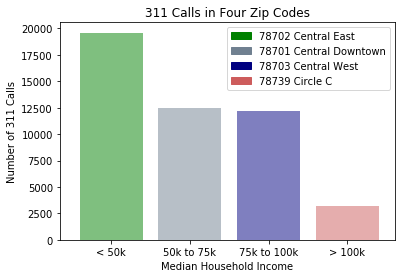

In [123]:
plt.show()

In [124]:
#Create stacked percentile bar chart for department composition per zip code
x_axis = np.arange(len(plot_group1b_summary))
plt.bar(x_axis, plot_group1b_summary, bottom=0, color='g', edgecolor='white', alpha=0.5, align="edge", label="Animal Services Office")
plt.bar(x_axis, plot_group2b_summary, bottom=plot_group1b_summary, color='b', edgecolor='white', alpha=0.5, align="edge", label="Austin Code Department")
plt.bar(x_axis, plot_group3b_summary, bottom=[i+j for i,j in zip(plot_group1b_summary, plot_group2b_summary)], color='maroon', edgecolor='white', alpha=0.5, align="edge", label="Transportation")
plt.bar(x_axis, plot_group4b_summary, bottom=[i+j+k for i,j,k in zip(plot_group1b_summary, plot_group2b_summary, plot_group3b_summary)], color='gold', edgecolor='white', alpha=0.5, align="edge", label="Austin Resource Recovery")
plt.bar(x_axis, plot_group5b_summary, bottom=[i+j+k+l for i,j,k,l in zip(plot_group1b_summary, plot_group2b_summary, plot_group3b_summary, plot_group4b_summary)], color='grey', edgecolor='white', alpha=0.5, align="edge", label='Public Works')
tick_locations = [value+0.4 for value in x_axis]
plt.xlim(-0.25, len(x_axis))
plt.xticks(tick_locations, ["< 50k", "50k to 75k", "75k to 100k", "> 100k"])

([<matplotlib.axis.XTick at 0x1ef3fb069e8>,
 <a list of 4 Text xticklabel objects>)

In [125]:
#Stylize stacked bar chart
plt.title("Household Income vs. Department/Type")
plt.xlabel("Median Household Income")
plt.ylabel("% of 311 Calls")
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), title="Department/Type")
leg = plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), title="Department/Type")


In [126]:
plt.savefig("Household_Inocme_vs_Department.png", bbox_extra_artists=(leg,), bbox_inches='tight')

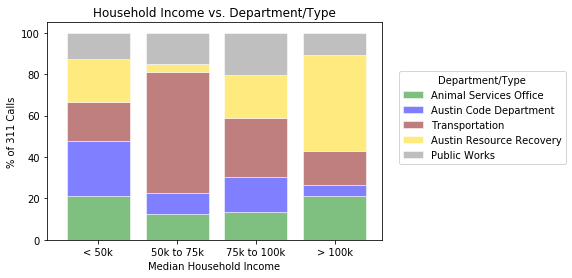

In [127]:
plt.show()